# Scraping

Probably overfitting. Should get something like 15 pages per type; the set seems to be too small right now (accuracy highly fluctuating). Original took 3 pages per type, maybe 5x would fix it? 

In [177]:
from ff_analysis_tools import ffa, accuracy_statistics, ffcoll_to_df, summaries_to_pred_csv, prediction_error
import pandas as pd
import numpy as np

In [6]:
help(ffa)

Help on function ffa in module ff_analysis_tools:

ffa(filename, tocsv_filename)
    Creates a csv containing summary and genre information, one-hotted, from a raw text file.



In [7]:
help(accuracy_statistics)

Help on function accuracy_statistics in module ff_analysis_tools:

accuracy_statistics(txt_src, csv_model_name_dict)
    Returns a barh with information about accuracy of predictions. 
    txt_src: the original scraped text file
    csv_model_name_dict: a dictionary containing information about the names of the csv prediction files and the names that will be shown in the chart. Should be formatted thus: {csv_predictions_file_1.csv: model_name_1, csv_predictions_file_2.csv: model_name_2 [...]}.



In [9]:
help(ffcoll_to_df)

Help on function ffcoll_to_df in module ff_analysis_tools:

ffcoll_to_df(filename, drop_rare=False)
    basically just go on ffnet and control a control c everything into a txt file.
    This works with multiple pages in one file as well.
    returns a DataFrame from a .txt filename



# Analysis

Goals: by-genre accuracy, by-popularity (favorites, etc) accuracy

General            0.0
Western            4.0
Crime             34.0
Spiritual         34.0
Poetry            82.0
Mystery           82.0
Horror            94.0
Suspense         107.0
Parody           111.0
Sci_Fi           194.0
Supernatural     196.0
Tragedy          215.0
Fantasy          254.0
Adventure        526.0
Drama            746.0
Angst            847.0
Family          1130.0
Friendship      1185.0
Hurt_Comfort    1372.0
Humor           1432.0
Romance         3051.0
dtype: object
500
0.0
1.4768867227883622
2.9537734455767244
4.430660168365087
5.907546891153449
7.384433613941812
8.861320336730174
10.338207059518535
11.815093782306898
13.29198050509526
14.768867227883623
16.245753950671986
17.722640673460347
19.19952739624871
20.67641411903707
22.153300841825434
23.630187564613795
25.107074287402153
26.58396101019052
28.060847732978882
29.537734455767247
31.014621178555608
32.49150790134397
33.96839462413233
35.445281346920694
36.92216806970905
38.39905479249742
39.8759415152

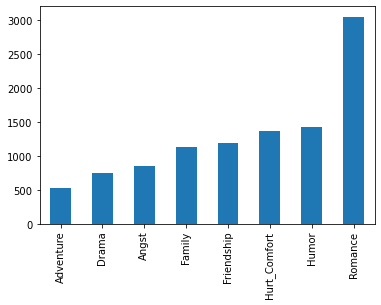

In [18]:
ffa("ff_dump_final.txt", "ff_dump_final")

In [21]:
training_df = pd.read_csv("ff_dump_final.csv")

In [23]:
training_df.tail()

,Unnamed: 0,Summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
6438,6764,Drabble. Basically lines stolen from the show.,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6439,6766,AU for BTVS Season 6. What if Giles had come t...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6440,6767,A small oneshot from the point of view of Spik...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6441,6768,A Slayer stands vigil... (FutureFic),0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6442,6770,AU. They've fought vampires and demons and hav...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
ktd = training_df.drop('Unnamed: 0', axis=1)

In [28]:
ktd.to_csv('ff_dump_final2.csv')

In [4]:
training_df = pd.read_csv("ff_dump_final2.csv")

In [5]:
training_df

,Unnamed: 0,Summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
0,0,One-shot! Kakashi has a bad nightmare.,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,What if sasuke took a different path. Sasuke/F...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,"[Oneshot] Boruto, Sarada and Mitsuki have some...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,"""I wish to nominate myself as Kazekage."" May t...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,Naruto has a big Surprise for his father but h...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6438,6438,Drabble. Basically lines stolen from the show.,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6439,6439,AU for BTVS Season 6. What if Giles had come t...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6440,6440,A small oneshot from the point of view of Spik...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6441,6441,A Slayer stands vigil... (FutureFic),0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [6]:
training_df.iloc[1491]

Unnamed: 0                                                   1491
Summary         The final shadow game is over and Bakura has b...
Adventure                                                     0.0
Angst                                                         0.0
Drama                                                         0.0
Family                                                        0.0
Friendship                                                    1.0
Humor                                                         0.0
Hurt_Comfort                                                  0.0
Romance                                                       1.0
Name: 1491, dtype: object

# Analysis: zdr/5 0.8

In [48]:
df1 = pd.read_csv('ff_dump_final2.csv')

In [50]:
df1 = df1.rename({'Summary': 'summary'}, axis=1)
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [51]:
df1.tail()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
6438,Drabble. Basically lines stolen from the show.,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6439,AU for BTVS Season 6. What if Giles had come t...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6440,A small oneshot from the point of view of Spik...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6441,A Slayer stands vigil... (FutureFic),0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6442,AU. They've fought vampires and demons and hav...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
df1.to_csv('ff_dump_final2.csv', index=False)

In [53]:
df1 = pd.read_csv('ff_dump_final2.csv')

In [54]:
df1.tail()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
6438,Drabble. Basically lines stolen from the show.,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6439,AU for BTVS Season 6. What if Giles had come t...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6440,A small oneshot from the point of view of Spik...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6441,A Slayer stands vigil... (FutureFic),0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6442,AU. They've fought vampires and demons and hav...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
df3 = pd.read_csv('PREDS_zdr5_ffdumpfinal2_2.csv')

In [58]:
df3.tail()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
6438,Drabble. Basically lines stolen from the show.,1,0,0,0,0,1,0,0
6439,AU for BTVS Season 6. What if Giles had come t...,0,0,0,0,1,0,0,1
6440,A small oneshot from the point of view of Spik...,0,0,0,0,0,0,1,1
6441,A Slayer stands vigil... (FutureFic),0,0,0,0,0,1,0,1
6442,AU. They've fought vampires and demons and hav...,0,1,0,0,0,0,1,0


In [59]:
df3.head()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
0,One-shot! Kakashi has a bad nightmare.,0,0,0,0,0,1,1,0
1,What if sasuke took a different path. Sasuke/F...,0,0,0,0,0,1,0,1
2,"[Oneshot] Boruto, Sarada and Mitsuki have some...",0,0,0,1,0,1,0,0
3,"""I wish to nominate myself as Kazekage."" May t...",0,0,1,0,0,1,0,0
4,Naruto has a big Surprise for his father but h...,0,0,0,0,1,1,0,0


In [61]:
df3.iloc[0]

summary         One-shot! Kakashi has a bad nightmare.
Adventure                                            0
Angst                                                0
Drama                                                0
Family                                               0
Friendship                                           0
Humor                                                1
Hurt_Comfort                                         1
Romance                                              0
Name: 0, dtype: object

In [62]:
df1.iloc[0]

summary         One-shot! Kakashi has a bad nightmare.
Adventure                                          0.0
Angst                                              0.0
Drama                                              0.0
Family                                             0.0
Friendship                                         0.0
Humor                                              1.0
Hurt_Comfort                                       0.0
Romance                                            0.0
Name: 0, dtype: object

In [64]:
compdf = df3.compare(df1)

In [69]:
ones = 0
twos = 0
threes = 0
fours = 0
for x in list(compdf.sum(axis=1)):
    if x == 1:
        ones += 1
    elif x == 2:
        twos += 1
    elif x == 3:
        threes += 1
    elif x == 4:
        fours += 1
    else:
        print(x)

print(ones, twos, threes, fours)

2581 95 16 1


In [66]:
compdf.tail()

Adventure       Angst       Drama       Family       Friendship        \
          self other  self other  self other   self other       self other   
6430       NaN   NaN   NaN   NaN   1.0   0.0    NaN   NaN        NaN   NaN   
6431       NaN   NaN   1.0   0.0   NaN   NaN    NaN   NaN        NaN   NaN   
6435       NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN        NaN   NaN   
6437       1.0   0.0   NaN   NaN   NaN   NaN    NaN   NaN        NaN   NaN   
6440       0.0   1.0   NaN   NaN   NaN   NaN    NaN   NaN        NaN   NaN   

     Humor       Hurt_Comfort       Romance        
      self other         self other    self other  
6430   NaN   NaN          NaN   NaN     NaN   NaN  
6431   NaN   NaN          NaN   NaN     NaN   NaN  
6435   NaN   NaN          1.0   0.0     NaN   NaN  
6437   NaN   NaN          NaN   NaN     NaN   NaN  
6440   NaN   NaN          1.0   0.0     1.0   0.0

In [70]:
len(compdf)

2693

In [93]:
zeros = len(df1) - len(compdf)


In [100]:
k1 = pd.DataFrame([zeros, ones, twos, threes, fours])
k1

,0
0,3750
1,2581
2,95
3,16
4,1


In [110]:
k2 = k1.T.rename({0: '2t2r', 1: '1t1r', 2: '2t1r', 3:'1t0r', 4:'2t0r'}, axis=1)
k3 = k2.rename({0:'zdr5-train'}, axis=0)
k4 = k3.applymap(lambda x: x / len(df1) * 100)
k4

,2t2r,1t1r,2t1r,1t0r,2t0r
zdr5-train,58.202701,40.058979,1.474468,0.248332,0.015521


<AxesSubplot:>

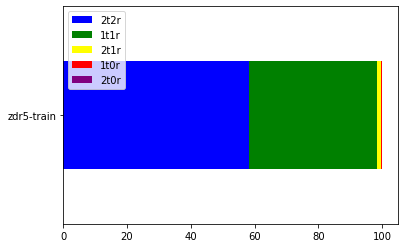

In [111]:
k4.plot.barh(stacked=True, color={'2t2r':'blue', '1t1r':'green', '2t1r':'yellow', '1t0r':'red', '2t0r':'purple'})

In [112]:
df100 = pd.read_csv('PREDS_zdr5_ffdump7.csv')

In [113]:
df100

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
0,Ignia loses his little brother while Natsu is ...,0,0,0,0,0,0,1,1
1,This is my first fanfiction. The story of Nats...,0,0,0,0,1,0,0,1
2,In which Natsu fails to ask a very important q...,0,0,0,0,0,1,0,1
3,Gruvia drabbles and one shots!,0,0,0,0,1,0,0,1
4,The blood was so unbelievably rare. Who would ...,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
217,Forced to be sociable by his so called friends...,0,0,0,0,0,0,1,1
218,Sequel to Tears of Rain: [SADLY DISCONTINUED],0,1,0,1,0,0,0,0
219,"Natsu and Erza had never met in their lives, b...",0,0,0,0,1,0,0,1
220,Everything has its own consequences. Lucy's de...,0,0,0,0,1,0,0,1


In [134]:
def acc_barh_table(truth_csv, preds_csv, namedict):
    df1 = pd.read_csv(truth_csv)
    try:
        df1 = df1.rename({'Summary': 'summary'}, axis=1)
        df1 = df1.drop(['Unnamed: 0'], axis=1)
    except:
        print('summary col/unnamed check')
    
    df3 = pd.read_csv(preds_csv)
    
    compdf = df3.compare(df1)
    
    zeros = len(df1) - len(compdf)
    ones = 0
    twos = 0
    threes = 0
    fours = 0
    for x in list(compdf.sum(axis=1)):
        if x == 1:
            ones += 1
        elif x == 2:
            twos += 1
        elif x == 3:
            threes += 1
        elif x == 4:
            fours += 1
        else:
            print(x)
            
    k1 = pd.DataFrame([zeros, ones, twos, threes, fours])
    k2 = k1.T.rename({0: '2t2r', 1: '1t1r', 2: '2t1r', 3:'1t0r', 4:'2t0r'}, axis=1)
    k3 = k2.rename(namedict, axis=0)
    k4 = k3.applymap(lambda x: x / len(df1) * 100)
    
    return k4

def acc_barh(tablelist):
    k5 = pd.concat(tablelist)
    k5.plot.barh(stacked=True, color={'2t2r':'blue', '1t1r':'green', '2t1r':'yellow', '1t0r':'red', '2t0r':'purple'})

In [118]:
df9 = ffcoll_to_df('ffdump7.txt', drop_rare=True)

In [124]:
df9.to_csv('ffdump7.csv')

In [121]:
df10 = pd.read_csv('PREDS_zdr5_ffdump7.csv')

In [122]:
df10

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
0,Ignia loses his little brother while Natsu is ...,0,0,0,0,0,0,1,1
1,This is my first fanfiction. The story of Nats...,0,0,0,0,1,0,0,1
2,In which Natsu fails to ask a very important q...,0,0,0,0,0,1,0,1
3,Gruvia drabbles and one shots!,0,0,0,0,1,0,0,1
4,The blood was so unbelievably rare. Who would ...,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
217,Forced to be sociable by his so called friends...,0,0,0,0,0,0,1,1
218,Sequel to Tears of Rain: [SADLY DISCONTINUED],0,1,0,1,0,0,0,0
219,"Natsu and Erza had never met in their lives, b...",0,0,0,0,1,0,0,1
220,Everything has its own consequences. Lucy's de...,0,0,0,0,1,0,0,1


In [125]:
df11 = pd.read_csv('ffdump7.csv')

In [126]:
df11

,Unnamed: 0,Summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
0,0,Ignia loses his little brother while Natsu is ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,This is my first fanfiction. The story of Nats...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,In which Natsu fails to ask a very important q...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,Gruvia drabbles and one shots!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,The blood was so unbelievably rare. Who would ...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
217,217,Forced to be sociable by his so called friends...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
218,218,Sequel to Tears of Rain: [SADLY DISCONTINUED],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219,219,"Natsu and Erza had never met in their lives, b...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
220,220,Everything has its own consequences. Lucy's de...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [139]:
zdr5_1 = acc_barh_table('ffdump7.csv', 'PREDS_zdr5_ffdump7.csv', {0:'zdr5-test-1'})

In [140]:
zdr5_o1 = acc_barh_table('ffdump7.csv', 'PREDS_zdr5_ffdump7_3.csv', {0:'zdr5-test-old-1'})

In [167]:
zdr5_o2 = acc_barh_table('ffdump7.csv', 'PREDS_zdr5_ffdump7_4.csv', {0:'zdr5-test-old-2'})

In [168]:
zdr5_o3 = acc_barh_table('ffdump7.csv', 'PREDS_zdr5_ffdump7_5.csv', {0:'zdr5-test-old-3'})

In [201]:
k = pd.read_csv('PREDS_zdr5_ffdump7_7.csv')
k["Adventure"] = 0
k = k.reindex(['summary', 'Adventure', 'Angst', 'Drama', 'Family', 'Friendship', 'Humor', 'Hurt_Comfort', 'Romance'], axis=1)
k.to_csv('PREDS_zdr5_ffdump7_14.csv', index=False)

In [202]:
pd.read_csv('PREDS_zdr5_ffdump7_14.csv').tail()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
217,Forced to be sociable by his so called friends...,0,0,0,0,0,0,1,1
218,Sequel to Tears of Rain: [SADLY DISCONTINUED],0,0,0,0,1,0,0,1
219,"Natsu and Erza had never met in their lives, b...",0,0,0,0,0,0,1,1
220,Everything has its own consequences. Lucy's de...,0,0,0,0,1,0,0,1
221,(Follow-up to my previous MidLu Halloween stor...,0,0,0,0,1,0,0,1


In [209]:
zdr5_o4 = acc_barh_table('ffdump7.csv', 'PREDS_zdr5_ffdump7_14.csv', {0:'zdr5-test-old-4'})

In [149]:
valh = acc_barh_table('ffdump7.csv', '15_jun_2_valh_preds.csv', {0:'valh'})

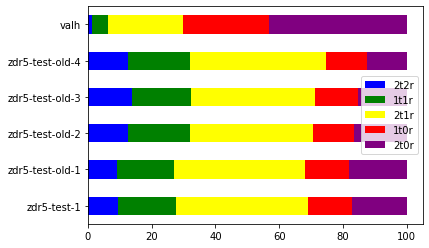

In [210]:
acc_barh([zdr5_1, zdr5_o1, zdr5_o2, zdr5_o3, zdr5_o4, valh]) #for ffdump7 

In [153]:
zdr5_f_1 = acc_barh_table('ff_dump_final.csv', 'PREDS_zdr5_ffdumpfin_current.csv', {0:'zdr5-train-1'})

In [155]:
zdr5_f_o1 = acc_barh_table('ff_dump_final.csv', 'PREDS_zdr5_ffdumpfin_o1.csv', {0:'zdr5-train-o1'})

In [156]:
zdr5_f_o2 = acc_barh_table('ff_dump_final.csv', 'PREDS_zdr5_ffdumpfin_o2.csv', {0:'zdr5-train-o2'})

In [157]:
zdr5_f_o3 = acc_barh_table('ff_dump_final.csv', 'PREDS_zdr5_ffdumpfin_o3.csv', {0:'zdr5-train-o3'})

In [161]:
zdr5_f_o4 = acc_barh_table('ff_dump_final.csv', 'PREDS_zdr5_ffdumpfin_o4.csv', {0:'zdr5-train-o4'})

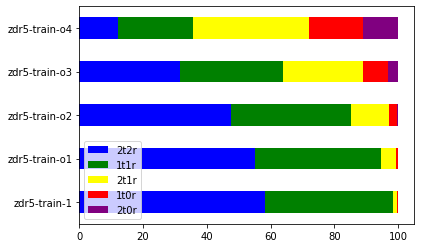

In [162]:
acc_barh([zdr5_f_1, zdr5_f_o1, zdr5_f_o2, zdr5_f_o3, zdr5_f_o4]) #on training data

In [170]:
pd.read_csv('PREDS_zdr5_ffdumpfin_o4.csv').tail()

,summary,Adventure,Angst,Drama,Family,Friendship,Humor,Hurt_Comfort,Romance
6438,Drabble. Basically lines stolen from the show.,0,0,0,0,1,0,0,1
6439,AU for BTVS Season 6. What if Giles had come t...,0,0,0,0,1,0,0,1
6440,A small oneshot from the point of view of Spik...,0,0,0,0,1,0,0,1
6441,A Slayer stands vigil... (FutureFic),0,0,0,0,0,1,0,1
6442,AU. They've fought vampires and demons and hav...,0,0,0,0,1,0,0,1
